In [9]:
#%matplotlib inline
%matplotlib notebook



import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.RL.DQN import DQN
from src.RL.EpsilonGreedyStrategy import EpsilonGreedyStrategy
from src.RL.Experience import Experience
from src.RL.ReplayMemory import ReplayMemory
from src.RL.CartPoleEnvManager import CartPoleEnvManager
from src.RL.Agent import Agent
import src.RL.Utils


In [10]:
env = gym.make('CartPole-v0')
env.reset()
done = False

for _ in range(100):
    env.render()
    if done == True:           
        env.reset()
    #new_state, reward, done, info = env.step(env.action_space.sample())
    _, _, done, _ = env.step(env.action_space.sample())
    
env.close()

<IPython.core.display.Javascript object>


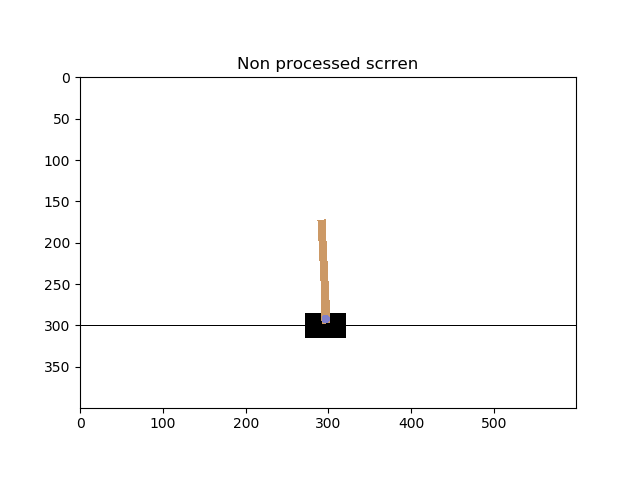

<IPython.core.display.Javascript object>


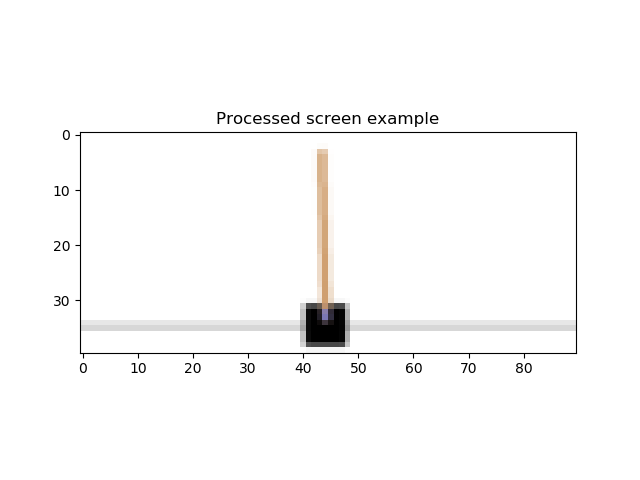

<IPython.core.display.Javascript object>


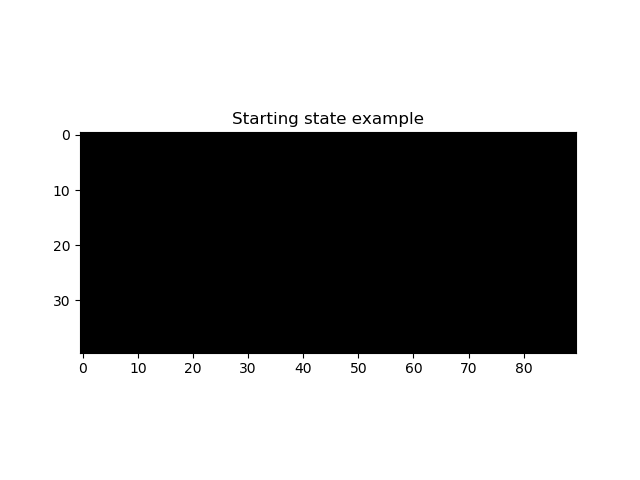

<IPython.core.display.Javascript object>


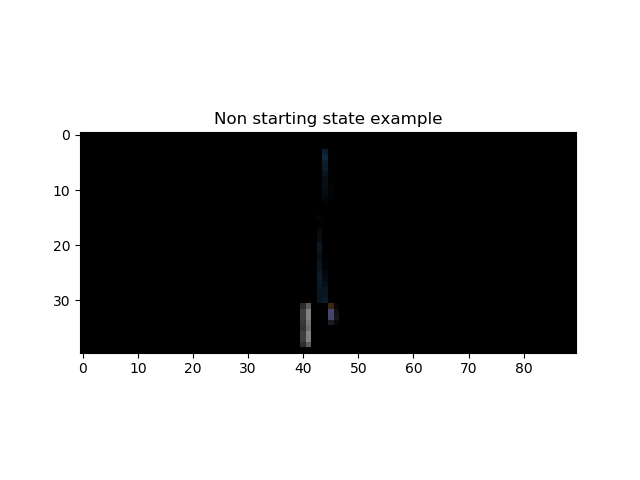

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


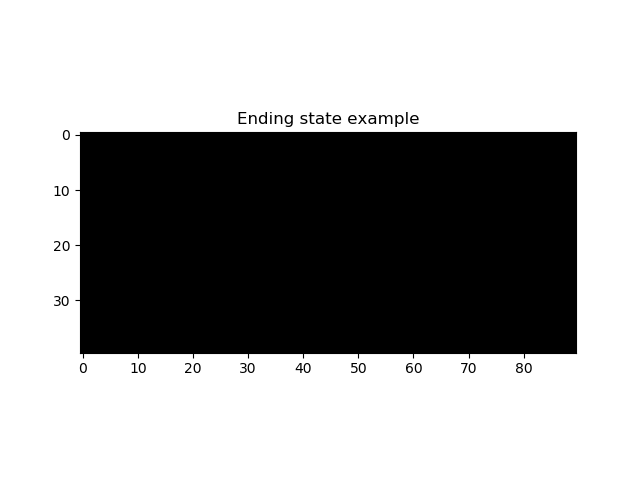

In [11]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
em = CartPoleEnvManager(device)
em.reset()
screen = em.render('rgb_array')


# Non processed scrren
plt.figure()
plt.imshow(screen)
plt.title('Non processed scrren')
plt.show()


# Processed screen example
screen = em.get_processed_screen()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Processed screen example')
plt.show()


# Starting state example
screen = em.get_state()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Starting state example')
plt.show()

# Non starting state example

for i in range(5):
    em.take_action(torch.tensor([1]))
screen = em.get_state()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Non starting state example')
plt.show()

# Ending state example

em.done = True
screen = em.get_state()

plt.figure()
plt.imshow(screen.squeeze(0).permute(1, 2, 0).cpu(), interpolation='none')
plt.title('Ending state example')
plt.show()